# Final Project: Part 2 

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')

In [25]:
%matplotlib inline

### Load the data

In [26]:
# Convert commas to decimals
beer_df = pd.read_csv('Consumo_cerveja.csv', decimal=',')

In [27]:
# Check out the columns
beer_df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,1/1/15,27.30,23.9,32.5,0.0,0,25.461
1,1/2/15,27.02,24.5,33.5,0.0,0,28.972
2,1/3/15,24.82,22.4,29.9,0.0,1,30.814
3,1/4/15,23.98,21.5,28.6,1.2,1,29.799
4,1/5/15,23.82,21.0,28.3,0.0,0,28.9


In [28]:
# Translate column names to English
beer_df.columns = ['Date', 'Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Weekend', 'Beer_Consumption']

In [29]:
# Convert Beer Consumption data from object to float
beer_df.loc[:, 'Beer_Consumption'] = pd.to_numeric(beer_df.loc[:, 'Beer_Consumption'])
beer_df.dtypes

Date                 object
Average_Temp        float64
Min_Temp            float64
Max_Temp            float64
Precipitation       float64
Weekend               int64
Beer_Consumption    float64
dtype: object

### Model the data

In [30]:
# Separate into target column and potential feature columns
target_col = 'Beer_Consumption'
feature_cols = ['Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Weekend']

X = beer_df.loc[:, feature_cols]
y = beer_df.loc[:, target_col]

In [31]:
# Check for null values
beer_df.isna().sum()

Date                0
Average_Temp        0
Min_Temp            0
Max_Temp            0
Precipitation       0
Weekend             0
Beer_Consumption    0
dtype: int64

In [37]:
# There are no null values, so there is no need to 
# Perform a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [38]:
# Import a model class (regression because the target variable is a number)
from sklearn.linear_model import LinearRegression

In [39]:
# Create a model from that class
lr = LinearRegression()

In [55]:
# Fit the model
lr.fit(X_train, y_train)

# Find R-Squared value
print('The R-squared value is ' + str(lr.score(X_test, y_test)) + '.')

# Find RMSE value
y_pred = lr.predict(X_test)
from sklearn import metrics
print('The RMSE value is ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) + '.')

# Find MAE value
print('The MAE value is ' + str(metrics.mean_absolute_error(y_test, y_pred)) + '.')

# Compare R-squared value to training set
print('The R-squared training set value is ' + str(lr.score(X_train, y_train))+ '.')

The R-squared value is 0.7147976706117619.
The RMSE value is 2.31904675370411.
The MAE value is 1.9249518861338164.
The R-squared training set value is 0.7211165049119344.


The model is underfitting, which means there is high bias. The model is not flexible enough.

### Explore the data

In [66]:
# Look at descriptive statistics for each individual variable
beer_df.describe(include='all')

,Date,Average_Temp,Min_Temp,Max_Temp,Precipitation,Weekend,Beer_Consumption
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
unique,365,NaN,NaN,NaN,NaN,NaN,NaN
top,4/24/15,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,NaN,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,NaN,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,NaN,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,NaN,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,NaN,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000


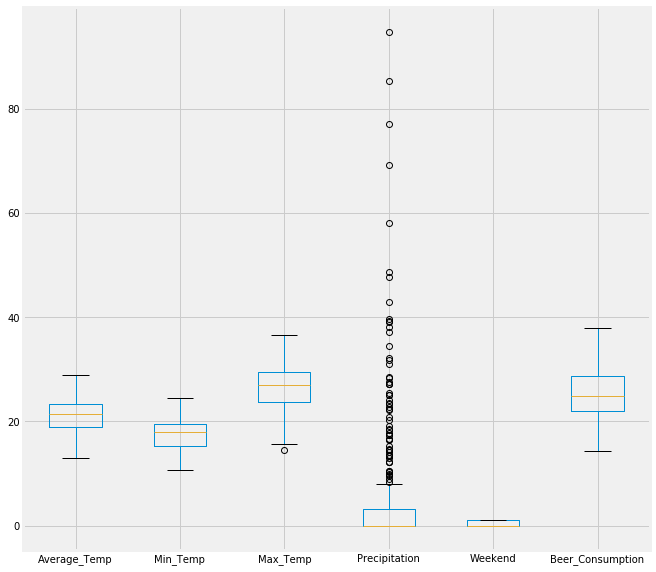

In [64]:
# Visualize the distribution of each individual variable besides date
# Date is excluded because it has one value for each day of the year
ax = beer_df.plot(kind='box', figsize=(10,10))

#### Observations

Precipitation is the variable with the most outliers. It appears to be strongly skewed, as all outliers are greater than the maximum value. Average temperature, minimum temperature, maximum temperature, weekend, and beer consumption appear to be roughly normally distributed. None of these varaibles have any outliers, with the exception of maximum temperatue, which has one outlier. 

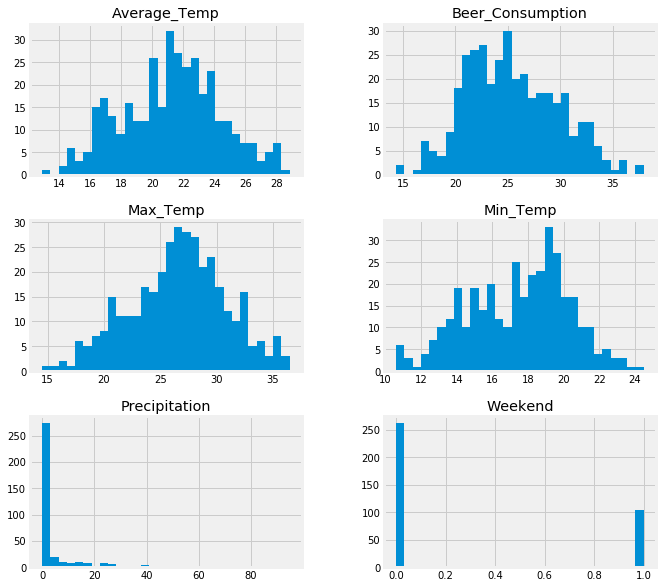

In [73]:
# Visualize the distribution of each variable in a histogram
ax = beer_df.hist(figsize=(10,10), bins=30)

#### Observations

Average temperature and maximum temperature appear to have a normal distribution while beer consumption is slightly skewed to the left and mimimum temperature is slightly sked to the right. Precipitation and weekend are skewed to the left.

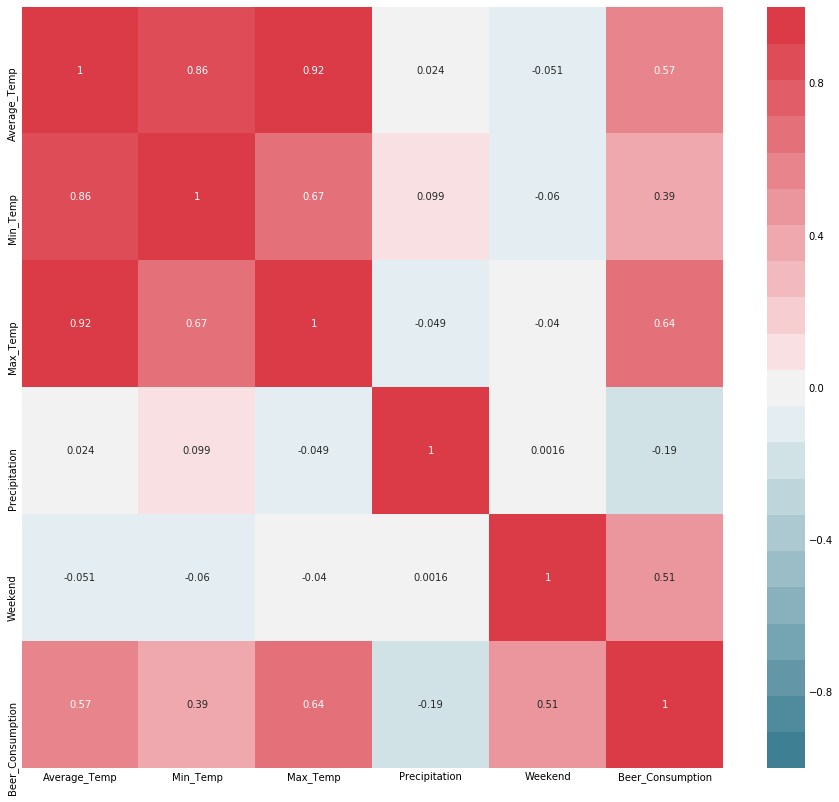

In [86]:
# Look at a heat map with correlation values to see relationship between variables, including each feature varibale with the target variable
fig,ax = plt.subplots(figsize=(14,14))
ax = sns.heatmap(beer_df.corr(), vmin = -1, vmax = 1, cmap=sns.diverging_palette(220,10,n=21), annot=True, ax=ax);

#### Observations

Beer consumption (target variable) is correlated with average temperature, minimum temperature, maximum temperature, and weeked. However, beer consumption has a very weak correlation with precipitation. 

Maximum temperature, minimmum temperature, and average temperature are correlated with each other. Weekend has a weak correlation with all other feature variables.

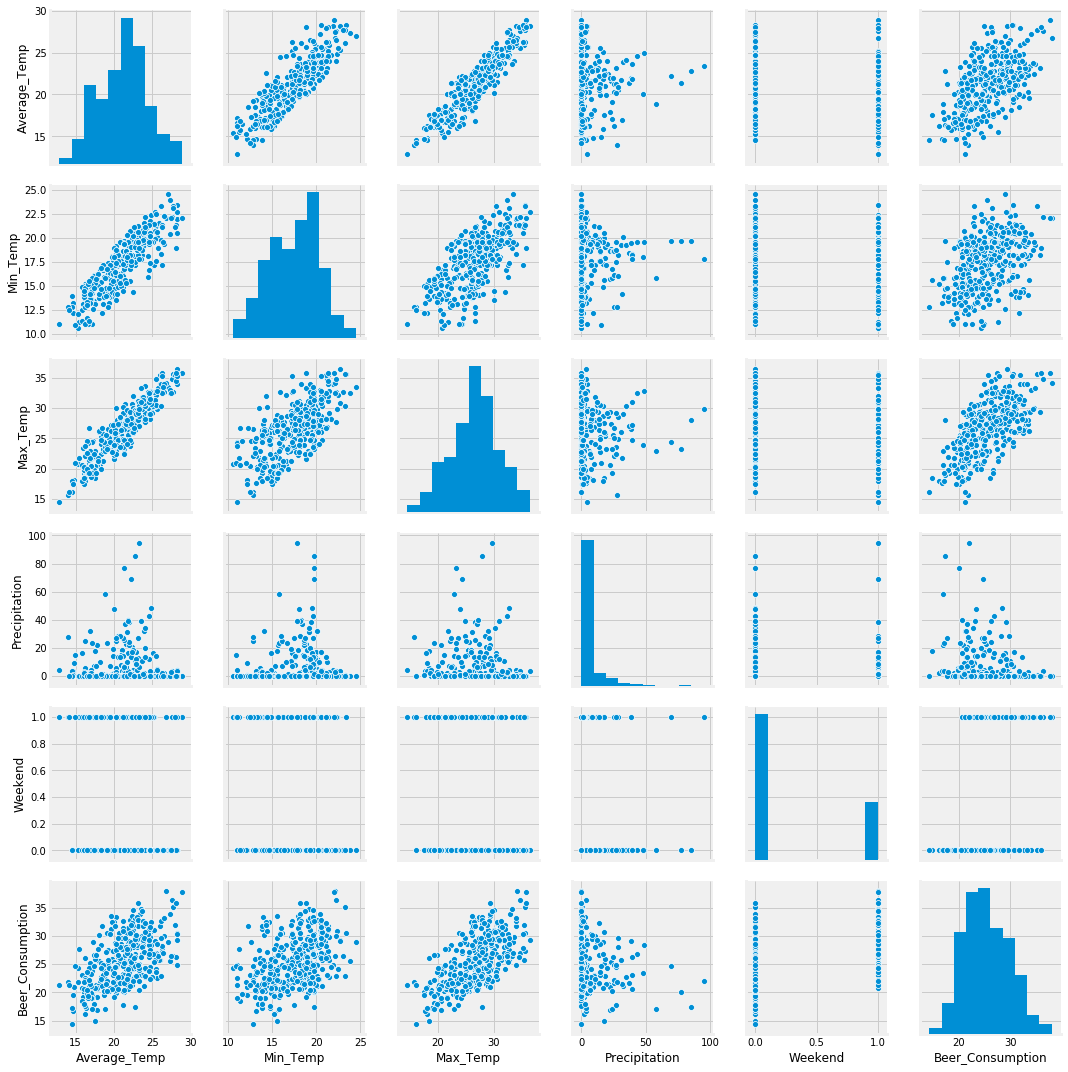

In [74]:
# Look at correlation of each feaure variable with the target variable
ax = sns.pairplot(beer_df)

#### Observations

Beer consumption is linearly correlated with average temperature, minimum temperature, and maximum temperature. However, minimum temperature, average temperature, and maximum temperature appear to have a bit of a linear relationship with each other. Beer consumption does not have a linear relationship with precipitation or weekend. However, it does appear that beer conumption is slightly higher on weekends, which is to be expected. Additionally, there appears to be some sort of relationship between precipitation and beer consumption where lower precipitation values do not seem to affect beer consumption but higher beer consumption values show lower beer consumption values.

### Final Observations and Analysis

A shortcoming of this data is that the average temperature, minimum temperature, and maximum temperature are correlated. One or more of these variables may need to be excluded from the feature variables. 

Another shortcoming of this data is that some of the feature variables do not have a linear realtionship with the target variable. This means that the model might not able to be solely based on linear regression.

To improve this model, I would try to:
- Add month as a feature varible. I could do this by slicing the Date column and creating a month column to see if beer conumption is affected by which month it is.
- Add season as a feature variable (again, look at the Date column to determine the season) and see if beer consumption has a linear relationed and/or is correlated with the season. 
- Drop some of the values in the precipitation column, since there are so many outliers and the data is heavily skewed.
- Drop one (or two) of the temperature variabled from the feature variables since they all seem to have collinearity. 
- Try a new model that we will learn in class, such as Decision Tree Regression.

I think using regression with the R-squared model is a good approach. Playing around with the feature variables more will allow me to test this hypothesis.